In [ ]:
'''
The following code is part of "SymbXRL: Symbolic Explainable Deep Reinforcement Learning for Mobile Networks"
Copyright - RESILIENT AI NETWORK LAB, IMDEA NETWORKS

DISCLAIMER: THE SOFTWARE IS PROVIDED “AS IS”, WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING
BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT.
'''

# IMPORTS

In [9]:
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
import graphviz
from graphviz import Digraph
from matplotlib.colors import LinearSegmentedColormap
import subprocess
import glob
from matplotlib.lines import Line2D
from itertools import product
import numpy as np
import pandas as pd

from matplotlib.lines import Line2D
from matplotlib.legend import Legend
Line2D._us_dashSeq = property(lambda self: self._dash_pattern[1])
Line2D._us_dashOffset = property(lambda self: self._dash_pattern[0])
Legend._ncol = property(lambda self: self._ncols)

# MSE Probability Distribution

In [2]:
KPI_LIST = ['MSEUr', 'DTUr']
QUARTILE_LIST = [f'Q{i}' for i in range(1, 5)] + ['MAX']
USERS = range(7)

def create_effects_list_for_mean(kpis=KPI_LIST, changes=['dec', 'const', 'inc'], quartiles = QUARTILE_LIST):
    return {
        kpi: [f'{change}({kpi}, {quartile})' for quartile in quartiles for change in changes] for kpi in kpis
    }

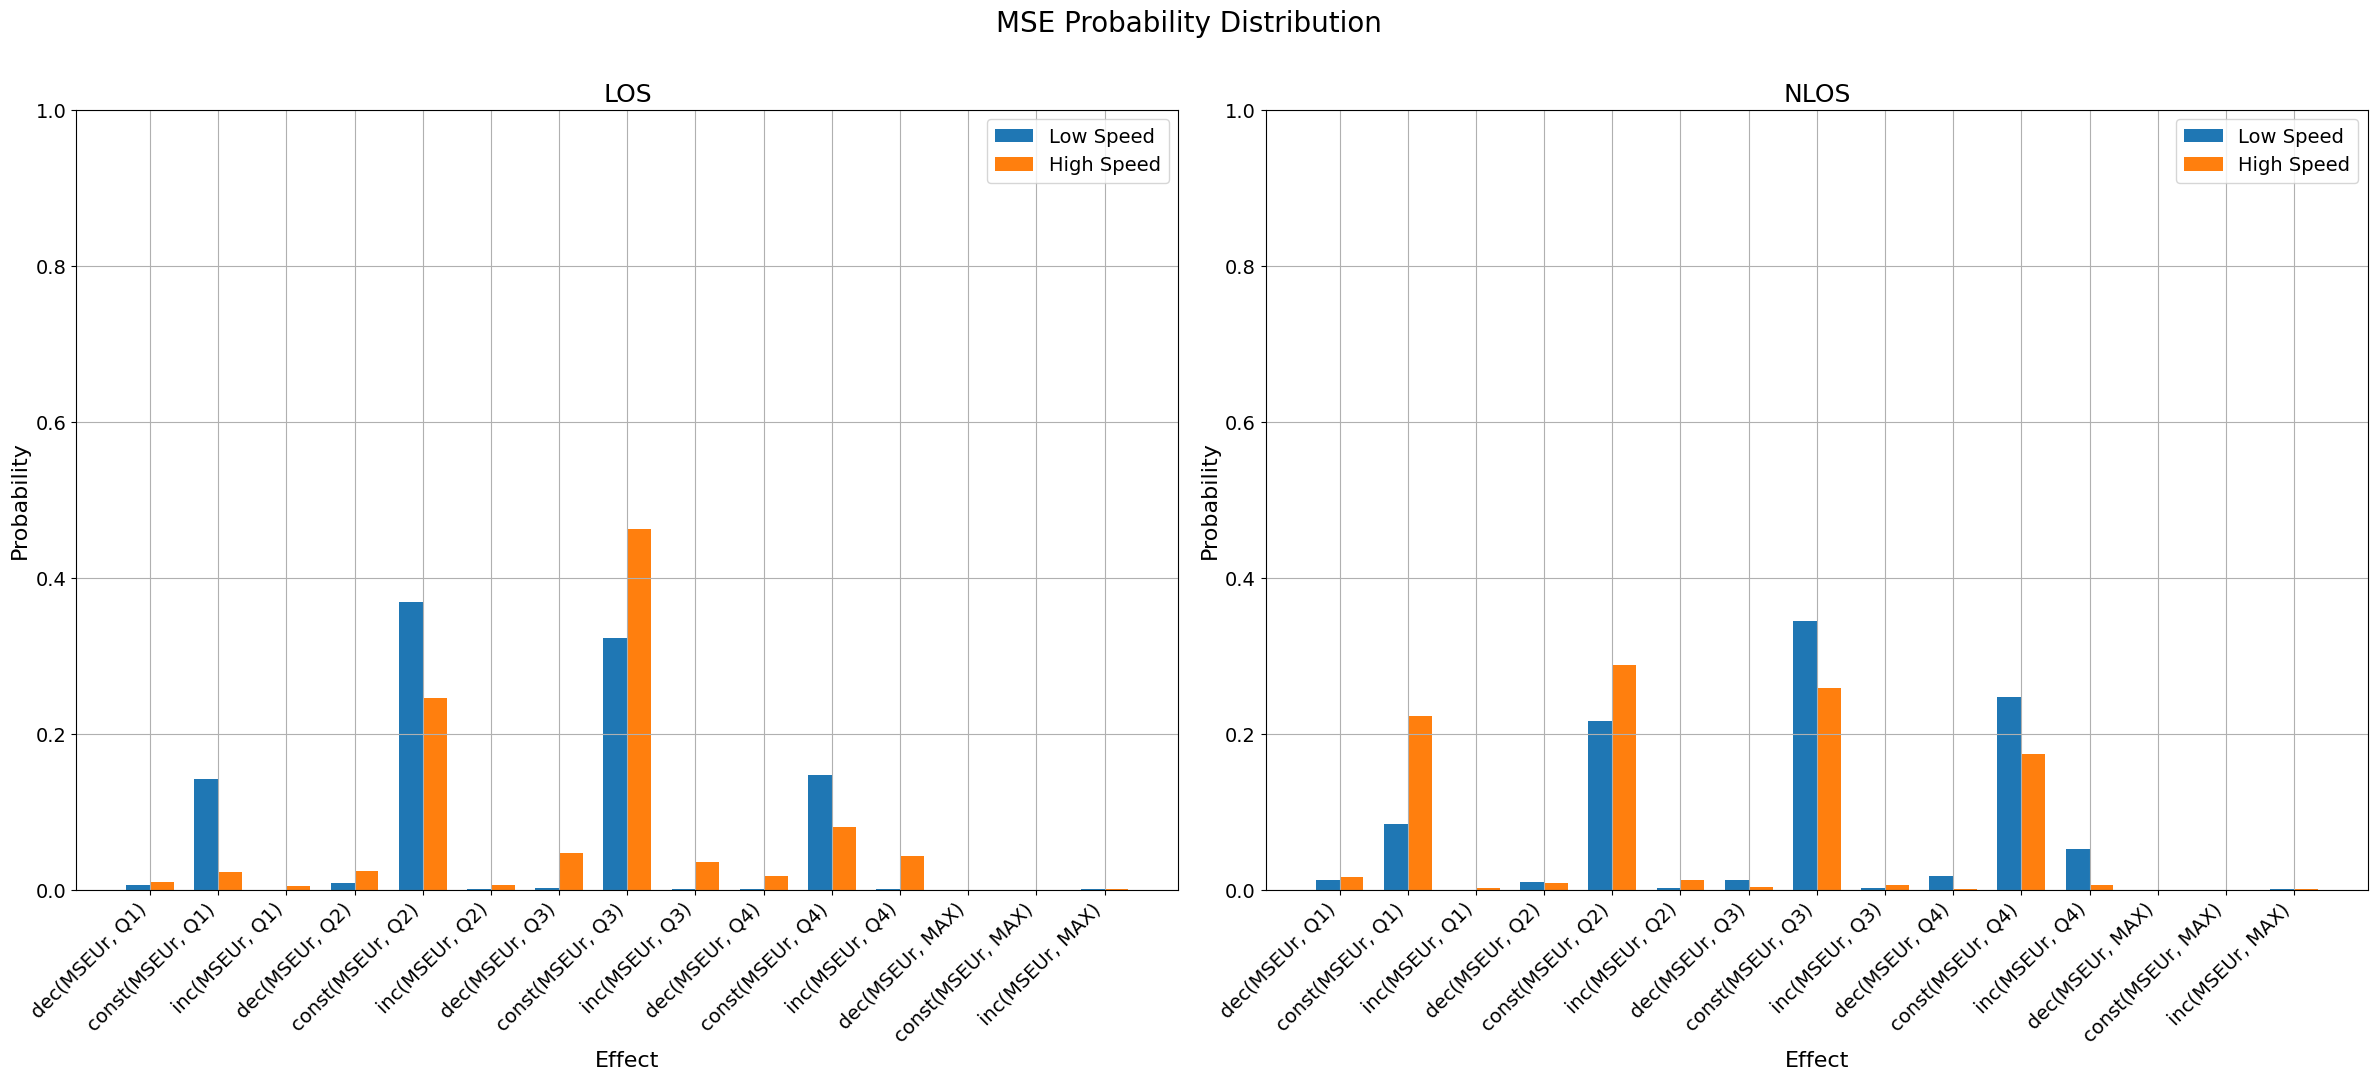

MSE probability distribution plot has been generated and displayed.


In [3]:
symbolic_LOS_LS_df = pd.read_csv("/home/abhishek/data/MIMOSimRL/SAC/Agents_Numeric_Symbolic_Raw_Data/DS_LOS_LS-Agent-SACG_LS_80-AS_No.csv")
symbolic_LOS_HS_df = pd.read_csv("/home/abhishek/data/MIMOSimRL/SAC/Agents_Numeric_Symbolic_Raw_Data/DS_LOS_HS2-Agent-SACG_HS2_1000-AS_No.csv")
symbolic_NLOS_LS_df = pd.read_csv("/home/abhishek/data/MIMOSimRL/SAC/Agents_Numeric_Symbolic_Raw_Data/DS_NLOS_LS-Agent-SACG_LS_100-AS_No.csv")
symbolic_NLOS_HS_df = pd.read_csv("/home/abhishek/data/MIMOSimRL/SAC/Agents_Numeric_Symbolic_Raw_Data/DS_NLOS_HS2-Agent-SACG_HS2_205-AS_No.csv")

# Define the analysis name and plot path
analysis_name = "Plots_for_Paper"
plot_path = "./visualizations/Plots_for_Paper" + "/MSE_Probability_Distribution_Sigh-Speed/combined"

plt.rcParams.update({'font.size': 14})  # Increase the default font size

# Define the effects list and colors for plotting
effects_list = create_effects_list_for_mean()

# Manually define distinct colors for LOS and NLOS
colors = ['#1f77b4', '#ff7f0e']  # blue and orange

# Function to plot the probability distribution
def plot_probability_distribution(ax, symbolic_ls_df, symbolic_hs_df, effects_list, scenario_label):
    width = 0.35  # Bar width
    x = np.arange(len(effects_list['MSEUr']))  # The label locations

    # Calculate the effect probability for low speed
    effect_counts_ls = symbolic_ls_df['MSEUr'].value_counts(normalize=True).reindex(effects_list['MSEUr'], fill_value=0)
    # Calculate the effect probability for high speed
    effect_counts_hs = symbolic_hs_df['MSEUr'].value_counts(normalize=True).reindex(effects_list['MSEUr'], fill_value=0)

    # Plot the probability distribution as bar plots
    ax.bar(x - width/2, effect_counts_ls.values, width, label='Low Speed', color=colors[0])
    ax.bar(x + width/2, effect_counts_hs.values, width, label='High Speed', color=colors[1])

    ax.set_xlabel('Effect', fontsize=16)
    ax.set_ylabel('Probability', fontsize=16)
    ax.set_xticks(x)
    ax.set_xticklabels(effects_list['MSEUr'], rotation=45, ha='right')
    ax.set_ylim(0, 1)  # Set y-axis limits between 0 and 1
    ax.grid(True)
    ax.set_title(scenario_label, fontsize=18)
    ax.legend()

# Create a new figure for the plot
fig, axs = plt.subplots(1, 2, figsize=(24, 10))
fig.suptitle('MSE Probability Distribution', fontsize=20)

# Subplots for each scenario
plot_probability_distribution(axs[0], symbolic_LOS_LS_df, symbolic_LOS_HS_df, effects_list, 'LOS')
plot_probability_distribution(axs[1], symbolic_NLOS_LS_df, symbolic_NLOS_HS_df, effects_list, 'NLOS')

# Adjust the subplot layout to make room for the rotated labels
plt.tight_layout()
fig.subplots_adjust(top=0.88, bottom=0.1)

# Display the plot
plt.show()

print("MSE probability distribution plot has been generated and displayed.")


# DTU Probability Distribution

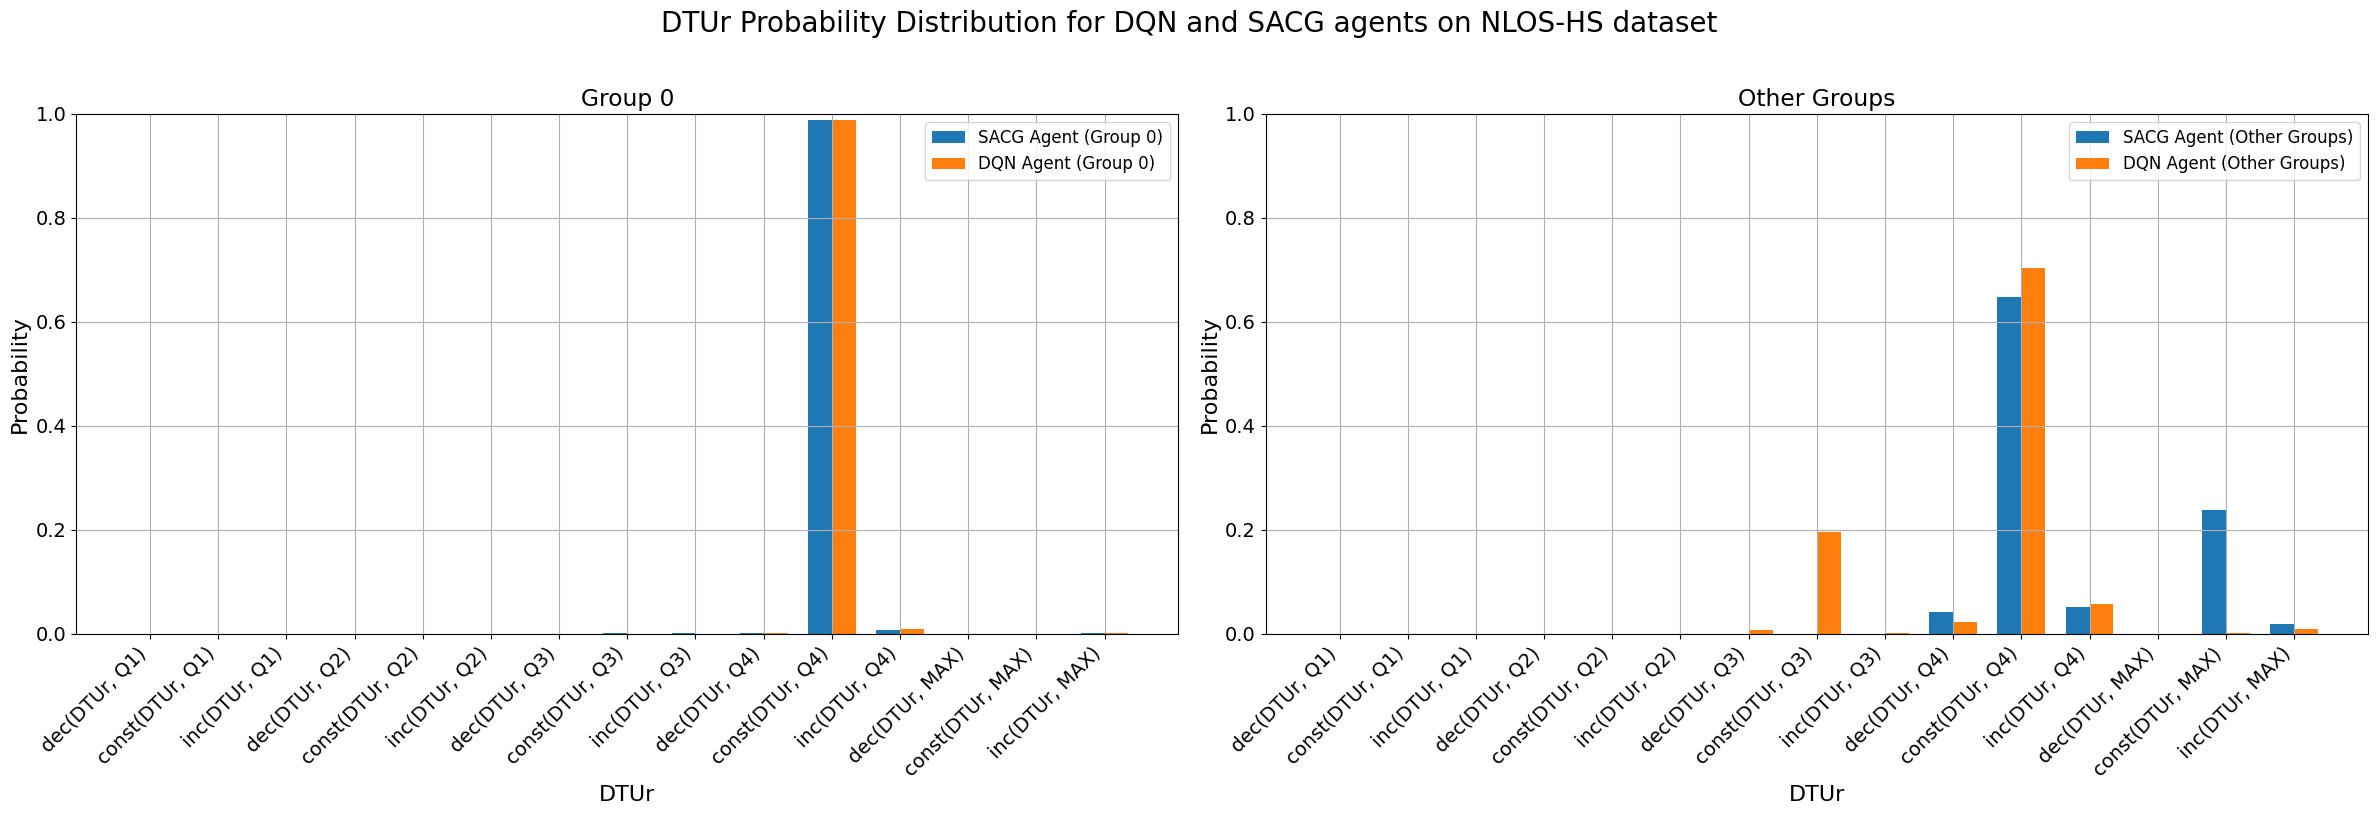

DTUr probability distribution plot has been generated and displayed.


In [4]:
symbolic_SACG_df = pd.read_csv("/home/abhishek/data/MIMOSimRL/SAC/Agents_Numeric_Symbolic_Raw_Data/DS_NLOS_HS2-Agent-SACG_HS2_205-AS_No.csv")
symbolic_DQN_df = pd.read_csv("/home/abhishek/data/MIMOSimRL/SAC/Agents_Numeric_Symbolic_Raw_Data/DS_NLOS_HS2-Agent-DQN_200_AS-No.csv")

# Define the analysis name and plot path
analysis_name = "Plots_for_Paper"
plot_path = "./visualizations/Plots_for_Paper" + "/DTUr_Probability_Distribution/NLOS-HS/with-grouping"

plt.rcParams.update({'font.size': 14})  # Increase the default font size

# Extract DTUr effects list
dtur_effects_list = create_effects_list_for_mean()['DTUr']

# Define colors for plotting
colors = ['#1f77b4', '#ff7f0e']  # blue and orange

# Separate the datasets for group 0 and other groups
symbolic_SACG_df_group0 = symbolic_SACG_df[symbolic_SACG_df['group'] == 0]
symbolic_SACG_df_other = symbolic_SACG_df[symbolic_SACG_df['group'] != 0]

symbolic_DQN_df_group0 = symbolic_DQN_df[symbolic_DQN_df['group'] == 0]
symbolic_DQN_df_other = symbolic_DQN_df[symbolic_DQN_df['group'] != 0]

# Create a new figure with 2 subplots in a 1x2 grid
fig, axs = plt.subplots(1, 2, figsize=(24, 8))
fig.suptitle('DTUr Probability Distribution for DQN and SACG agents on NLOS-HS dataset', fontsize=20)

# Combine all groups for each dataset and plot the probability distribution
width = 0.35  # Bar width
x = np.arange(len(dtur_effects_list))  # The label locations

# Function to plot the probability distribution
def plot_probability_distribution(ax, symbolic_df, effects_list, label, color, width, offset):
    # Calculate the effect probability
    effect_counts = symbolic_df['DTUr'].value_counts(normalize=True).reindex(effects_list, fill_value=0)
    
    # Plot the probability distribution as bar plots
    ax.bar(x + offset * width, effect_counts.values, width, label=label, color=color)

# Plot for group 0
axs[0].set_title('Group 0')
plot_probability_distribution(axs[0], symbolic_SACG_df_group0, dtur_effects_list, 'SACG Agent (Group 0)', colors[0], width, -0.5)
plot_probability_distribution(axs[0], symbolic_DQN_df_group0, dtur_effects_list, 'DQN Agent (Group 0)', colors[1], width, 0.5)
axs[0].set_xlabel('DTUr', fontsize=16)
axs[0].set_ylabel('Probability', fontsize=16)
axs[0].set_xticks(x)
axs[0].set_ylim(0, 1)  # Set y-axis limits between 0 and 1
axs[0].set_xticklabels(dtur_effects_list, rotation=45, ha='right')
axs[0].grid(True)
axs[0].legend(fontsize=12)

# Plot for other groups
axs[1].set_title('Other Groups')
plot_probability_distribution(axs[1], symbolic_SACG_df_other, dtur_effects_list, 'SACG Agent (Other Groups)', colors[0], width, -0.5)
plot_probability_distribution(axs[1], symbolic_DQN_df_other, dtur_effects_list, 'DQN Agent (Other Groups)', colors[1], width, 0.5)
axs[1].set_xlabel('DTUr', fontsize=16)
axs[1].set_ylabel('Probability', fontsize=16)
axs[1].set_xticks(x)
axs[1].set_ylim(0, 1)  # Set y-axis limits between 0 and 1
axs[1].set_xticklabels(dtur_effects_list, rotation=45, ha='right')
axs[1].grid(True)
axs[1].legend(fontsize=12)

# Adjust the layout to make room for the rotated labels
plt.tight_layout()
fig.subplots_adjust(top=0.85, bottom=0.2)

# Display the plot
plt.show()

print("DTUr probability distribution plot has been generated and displayed.")

# KNOWLEDGE GRAPHS - SYMBXRL

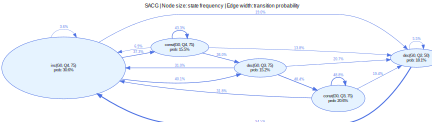

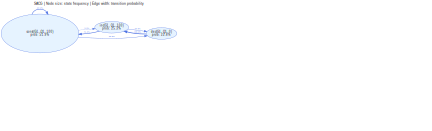

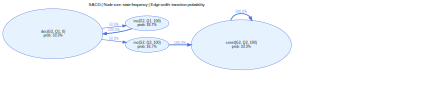

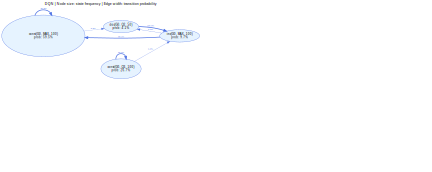

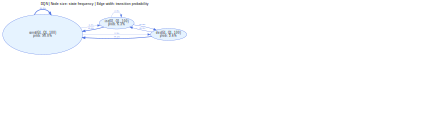

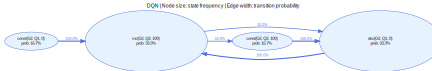

Decision graphs for each group have been generated and displayed.


In [10]:
symbolic_SACG_df = pd.read_csv("/home/abhishek/data/MIMOSimRL/SAC/Agents_Numeric_Symbolic_Raw_Data/DS_NLOS_HS2-Agent-SACG_HS2_205-AS_No.csv")
symbolic_DQN_df = pd.read_csv("/home/abhishek/data/MIMOSimRL/SAC/Agents_Numeric_Symbolic_Raw_Data/DS_NLOS_HS2-Agent-DQN_200_AS-No.csv")

def plot_graph_from_data_for_paper(df, column_name, output_path, min_prob, min_edge_prob, agent_name, layout='dot', keep_nodes=None):
    if keep_nodes is None:
        keep_nodes = []
    
    cross_data = pd.crosstab(df[column_name], df[column_name].shift(-1), normalize='index') * 100
    decision_counts = df[column_name].value_counts(normalize=True)
    
    dot = Digraph(comment='Decision Graph', engine=layout)
    dot.attr(rankdir='LR', size='6,4', dpi='400', bgcolor='white')
    
    # Filter and renormalize node probabilities
    filtered_decision_counts = {node: freq for node, freq in decision_counts.items() 
                                if freq >= min_prob or node in keep_nodes}
    total_filtered_freq = sum(filtered_decision_counts.values())
    filtered_decision_counts = {node: freq / total_filtered_freq for node, freq in filtered_decision_counts.items()}
    
    # Normalize frequencies for better node size scaling
    max_freq = max(filtered_decision_counts.values())
    min_freq = min(filtered_decision_counts.values())
    
    # Add nodes
    for node, freq in filtered_decision_counts.items():
        node_size = 0.5 + (freq - min_freq) / (max_freq - min_freq) * 3.5
        label = node.split(' - ')
        label.append(f'prob: {freq:.1%}')
        label = '\n'.join(label)
        dot.node(node, label, shape='ellipse', 
                 width=str(node_size), height=str(node_size * 0.5),
                 style='filled', fillcolor='#E6F3FF', color='#4A6FE3',
                 fontname='Arial', fontsize='10')
    
    # Filter and renormalize edge probabilities
    filtered_cross_data = {}
    for i in filtered_decision_counts:
        if i in cross_data.index:
            row = cross_data.loc[i]
            filtered_row = {j: prob for j, prob in row.items() 
                            if j in filtered_decision_counts and prob >= min_edge_prob}
            if filtered_row:
                total_filtered_prob = sum(filtered_row.values())
                filtered_cross_data[i] = {j: prob / total_filtered_prob * 100 
                                          for j, prob in filtered_row.items()}
    
    # Add edges
    for i, row in filtered_cross_data.items():
        for j, prob in row.items():
            penwidth = 0.5 + prob / 50
            dot.edge(i, j, 
                     label=f'{prob:.1f}%', 
                     penwidth=str(penwidth),
                     color='#4A6FE3',
                     fontname='Arial', fontsize='8',
                     fontcolor='#4A6FE3')
    
    # Add legend
    dot.attr(label=f'{agent_name} | Node size: state frequency | Edge width: transition probability', 
             fontname='Arial', fontsize='12', labelloc='t')
    
    # Display the graph
    display(dot)
    
    return dot

def create_decision_graphs_for_groups(df, agent_name, plot_path, min_prob=0.001, min_edge_prob=0.01, keep_nodes=None):
    layouts = ['dot']
    groups = df['group'].unique()
    for group in groups:
        group_data = df[df['group'] == group]
        for layout in layouts:
            file_name = f"Decision_Graph_{agent_name}_Group_{group}_{layout}"
            full_file_path = os.path.join(plot_path, file_name)
            plot_graph_from_data_for_paper(group_data, 'decision', full_file_path, min_prob, min_edge_prob, agent_name, layout, keep_nodes)

# Set up parameters
plt.rcParams.update({'font.size': 14})  # Increase the default font size

analysis_name = "Plots_for_Paper"
plot_path = "./visualizations/Plots_for_Paper" + "/Decision_Graph_V2.2/"

# Create the directories for saving the plots
plot_path_SACG = f"./{plot_path}/SACG"
plot_path_DQN = f"./{plot_path}/DQN"

os.makedirs(plot_path_SACG, exist_ok=True)
os.makedirs(plot_path_DQN, exist_ok=True)

# List of nodes to keep regardless of their probability
nodes_to_keep = ['Decision A', 'Decision B', 'Decision C']

# Generate and display the graphs for SACG agent
create_decision_graphs_for_groups(symbolic_SACG_df, "SACG", plot_path_SACG, min_prob=0.092, min_edge_prob=2)

# Generate and display the graphs for DQN agent
create_decision_graphs_for_groups(symbolic_DQN_df, "DQN", plot_path_DQN, min_prob=0.031, min_edge_prob=2, keep_nodes=[])

print("Decision graphs for each group have been generated and displayed.")


# ACTION STEERING VARIANTS

/tmp/ipykernel_3707521/1791935068.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='as_mode', y='Relative Cumulative Reward', hue=None, data=plot_data,


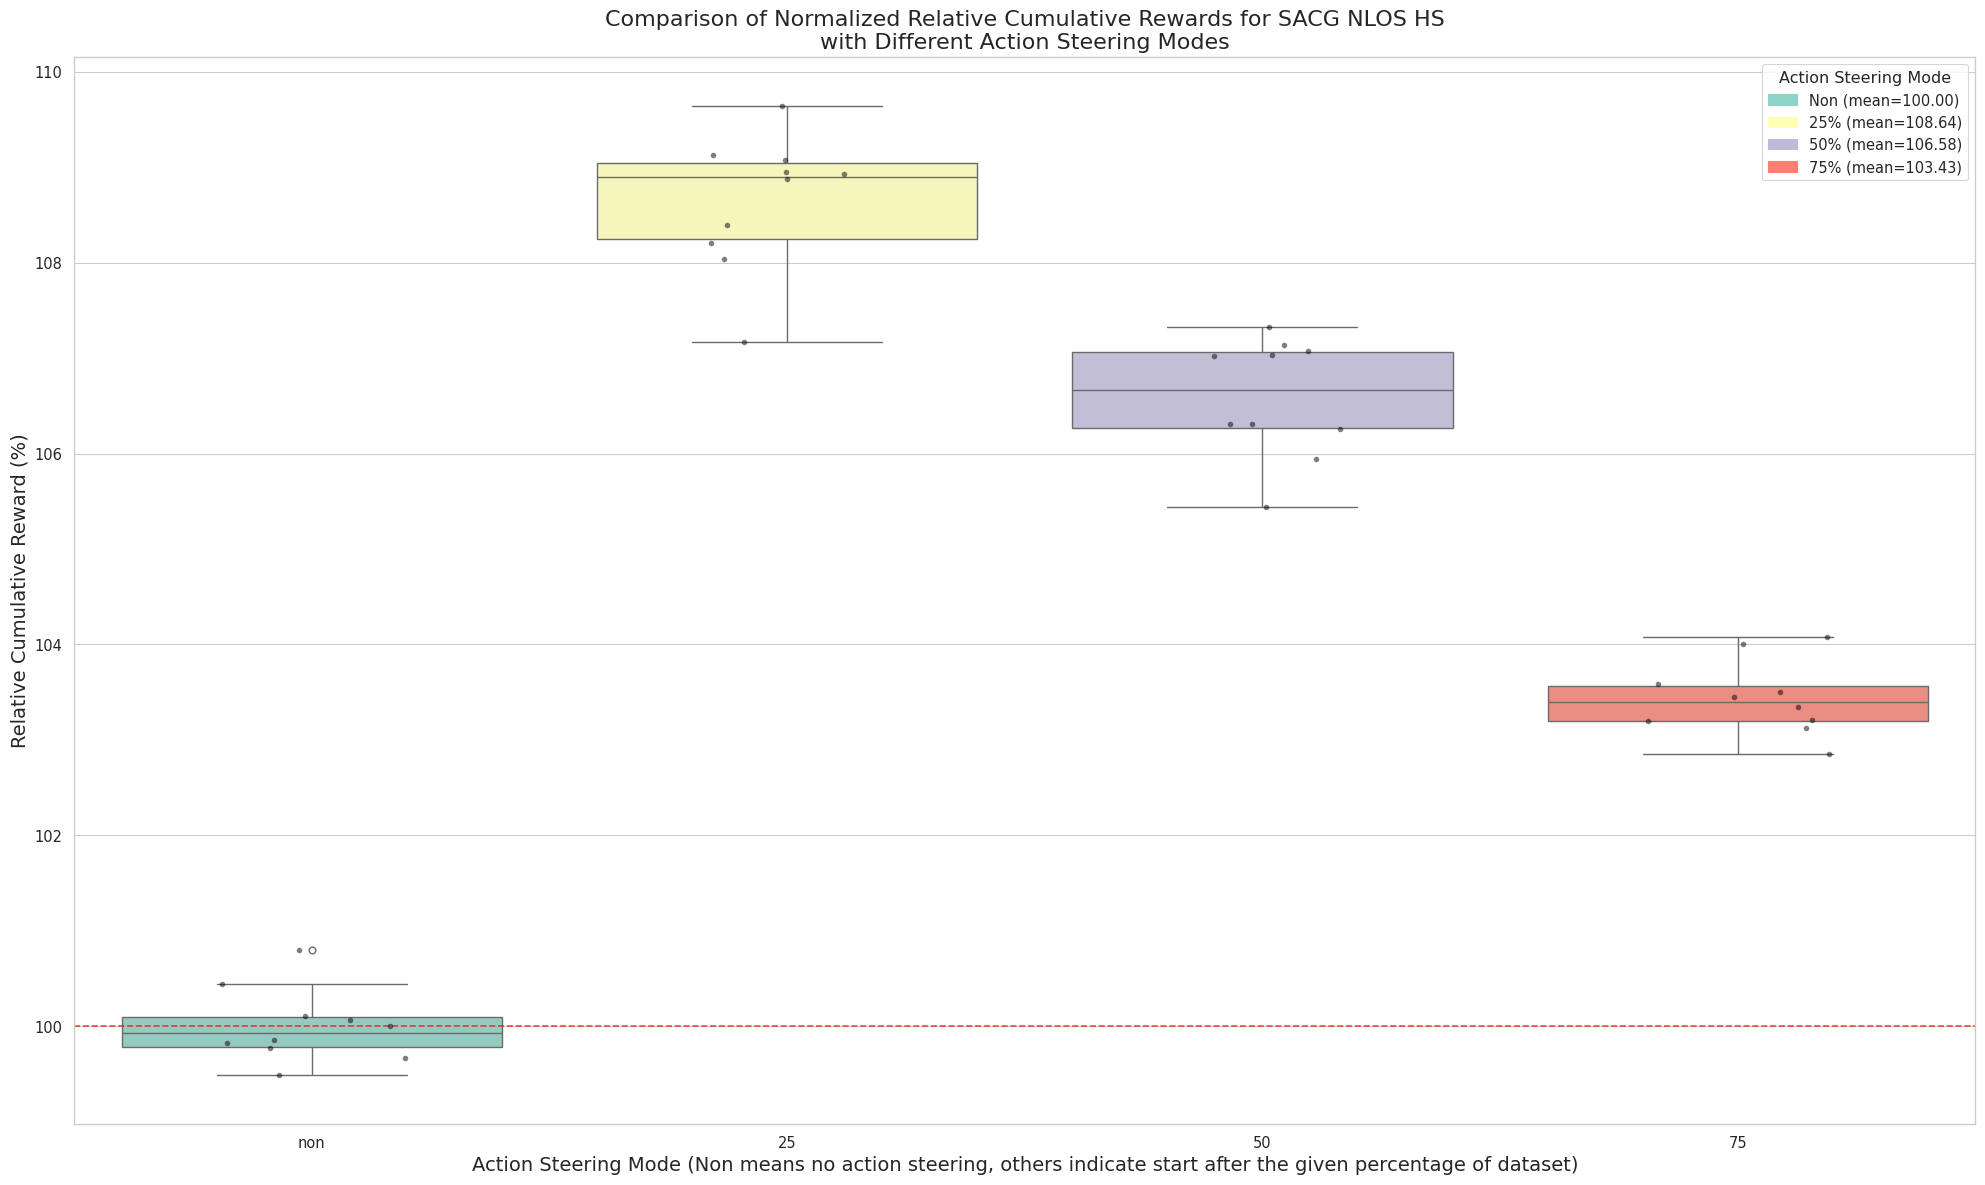

In [6]:
as_info_complete_df = pd.read_csv(f"/home/abhishek/data/MIMOSimRL/SAC/Agents_Numeric_Symbolic_Raw_Data/processed_csvs/processed_action_steering_results.csv")

# Function to normalize data and prepare for plotting
def normalize_and_prepare_data(df, run_columns, non_as_mean):
    normalized_df = df.copy()
    normalized_df[run_columns] = normalized_df[run_columns].apply(lambda x: (x / non_as_mean) * 100)
    plot_data = normalized_df.melt(id_vars=['as_mode'], 
                                   value_vars=run_columns,
                                   var_name='run', value_name='Relative Cumulative Reward')
    return normalized_df, plot_data

# Function to plot data
def plot_normalized_rewards(plot_data, means):
    plt.figure(figsize=(20, 12))
    sns.set_style("whitegrid")
    sns.set_context("paper", font_scale=1.2)

    # Create box plot
    ax = sns.boxplot(x='as_mode', y='Relative Cumulative Reward', hue=None, data=plot_data, 
                     order=['non', '25', '50', '75'],
                     palette='Set3', dodge=False)

    # Customize the plot
    plt.title('Comparison of Normalized Relative Cumulative Rewards for SACG NLOS HS\nwith Different Action Steering Modes', fontsize=16)
    plt.xlabel('Action Steering Mode (Non means no action steering, others indicate start after the given percentage of dataset)', fontsize=14)
    plt.ylabel('Relative Cumulative Reward (%)', fontsize=14)

    # Add jittered points for individual runs
    sns.stripplot(x='as_mode', y='Relative Cumulative Reward', data=plot_data,
                  order=['non', '25', '50', '75'],
                  color='black', alpha=0.5, jitter=0.2, size=4)

    # Add a horizontal line at 100%
    plt.axhline(y=100, color='r', linestyle='--', alpha=0.7)

    # Add a custom legend with mean values
    from matplotlib.patches import Patch
    legend_labels = [f'Non (mean={means["non"]:.2f})', 
                     f'25% (mean={means["25"]:.2f})', 
                     f'50% (mean={means["50"]:.2f})', 
                     f'75% (mean={means["75"]:.2f})']
    legend_colors = sns.color_palette('Set3')[:4]
    legend_patches = [Patch(color=legend_colors[i], label=legend_labels[i]) for i in range(len(legend_labels))]
    plt.legend(handles=legend_patches, title='Action Steering Mode', loc='upper right')

    # Adjust layout and display
    plt.tight_layout()
    plt.show()

# Filter the dataframe for SACG, NLOS, HS
df_filtered = as_info_complete_df[(as_info_complete_df['agent_name'] == 'SACG') & 
                                  (as_info_complete_df['dataset'] == 'NLOS') & 
                                  (as_info_complete_df['speed'] == 'HS')]

# Calculate the mean value for the 'non' action steering mode
run_columns = ['run_1', 'run_2', 'run_3', 'run_4', 'run_5', 'run_6', 'run_7', 'run_8', 'run_9', 'run_10']
non_as_mean = df_filtered[df_filtered['as_mode'] == 'non'][run_columns].values.mean()

# Normalize and prepare data
normalized_df, plot_data = normalize_and_prepare_data(df_filtered, run_columns, non_as_mean)

# Calculate mean values for each mode
means = normalized_df.groupby('as_mode')[run_columns].mean().mean(axis=1).to_dict()

# Plot normalized rewards
plot_normalized_rewards(plot_data, means)


# COMPARISION WITH METIS

/tmp/ipykernel_3707521/3729548485.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=ax, x='as_mode', y='Relative Cumulative Reward', data=plot_data,


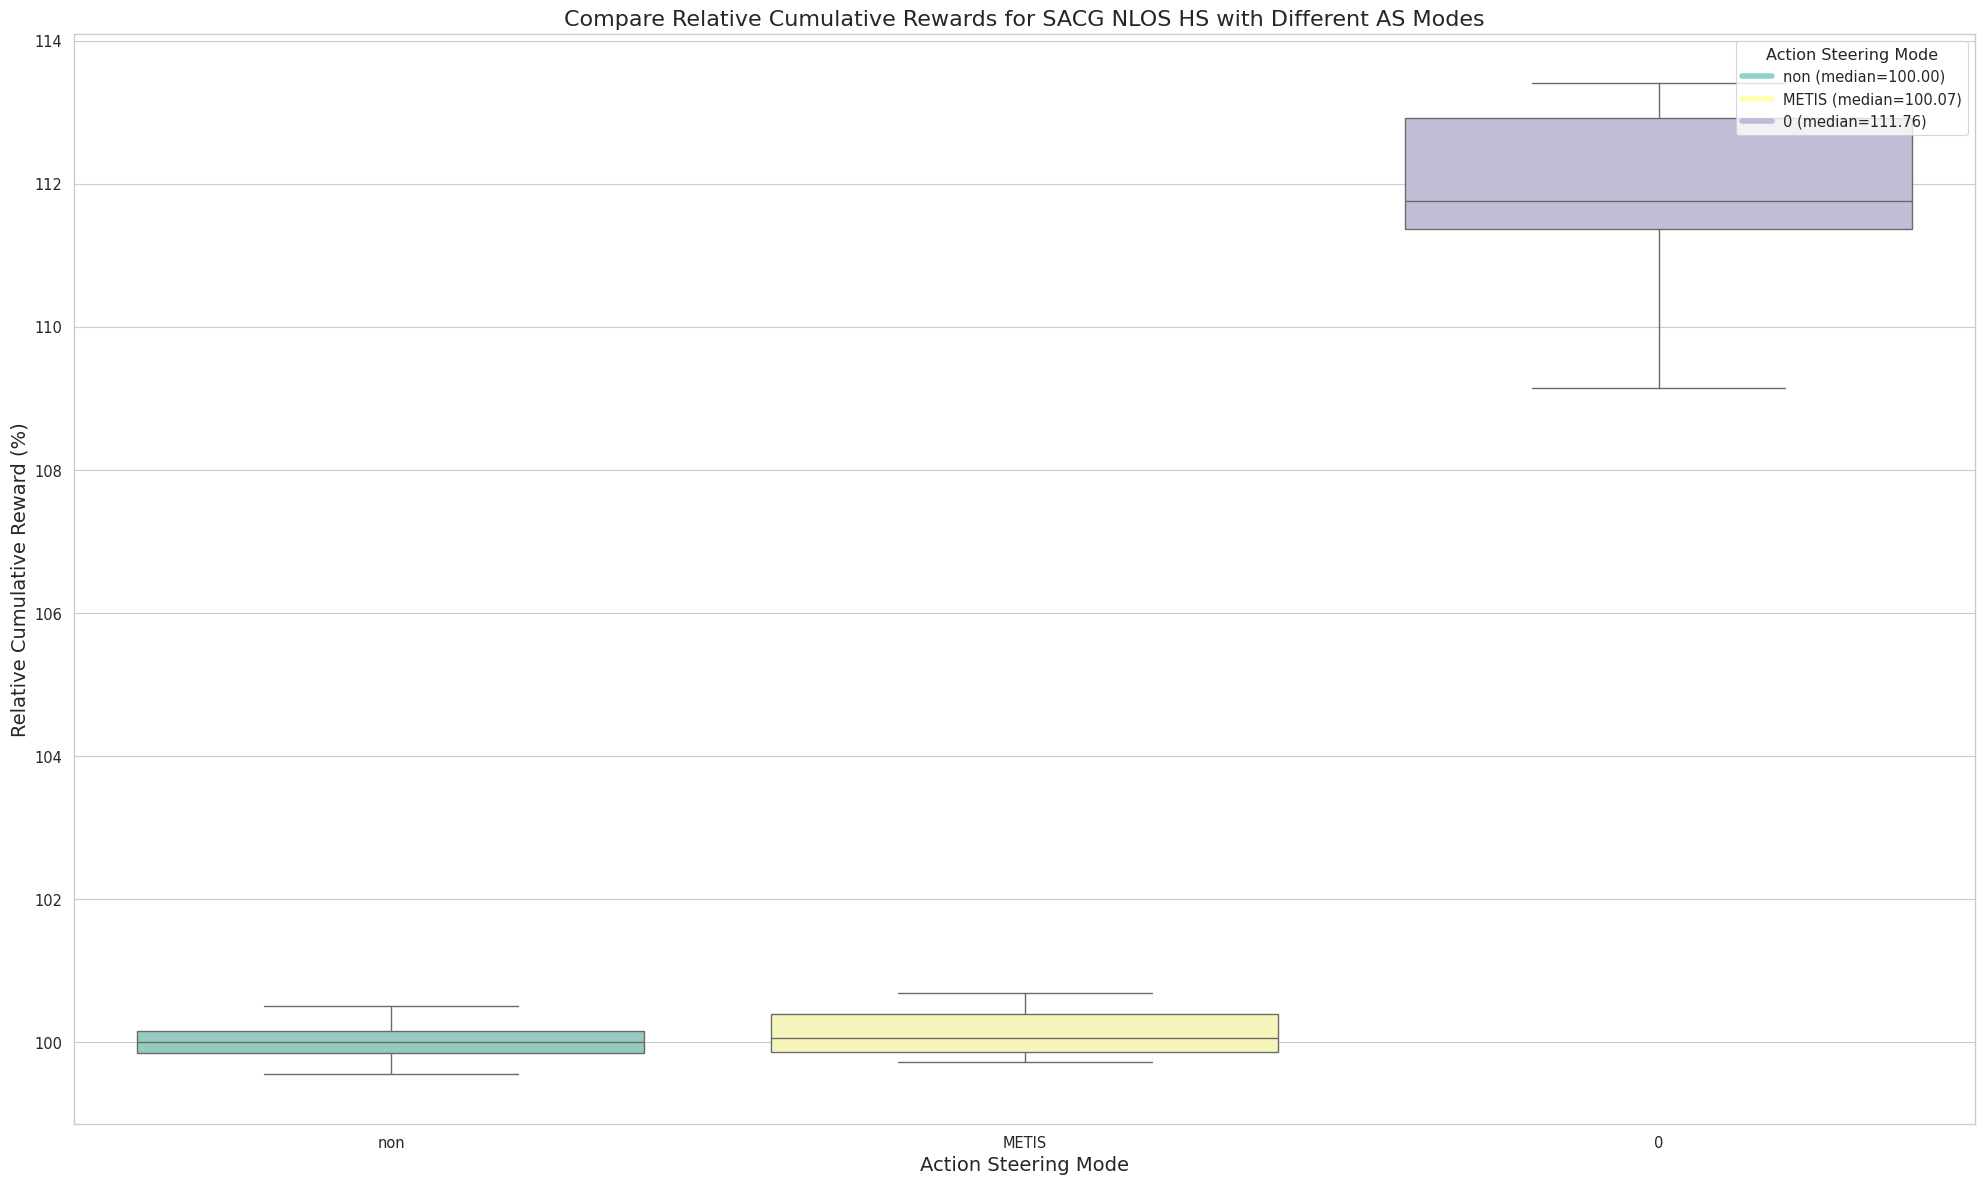

In [7]:
# Function to normalize data and prepare for plotting
def normalize_and_prepare_data(df, run_columns, non_as_median):
    normalized_df = df.copy()
    
    # Normalize all data, including 'non' mode, using the median of 'non' mode
    normalized_df[run_columns] = normalized_df[run_columns].apply(lambda x: (x / non_as_median) * 100)
    
    plot_data = normalized_df.melt(id_vars=['as_mode'], 
                                   value_vars=run_columns,
                                   var_name='run', value_name='Relative Cumulative Reward')
    return normalized_df, plot_data

# Function to fix ncols issue in tikzplotlib
def tikzplotlib_fix_ncols(fig):
    for ax in fig.get_axes():
        handles, labels = ax.get_legend_handles_labels()
        if len(handles) > 0:
            ax.legend(handles=handles, labels=labels, ncol=1)

def plot_normalized_rewards(plot_data, medians, analysis_name):
    plt.rcParams.update({'font.size': 14})
    fig, ax = plt.subplots(figsize=(20, 12))
    sns.set_style("whitegrid")
    sns.set_context("paper", font_scale=1.2)

    # Create box plot with the new order
    sns.boxplot(ax=ax, x='as_mode', y='Relative Cumulative Reward', data=plot_data, 
                order=['non', 'METIS', '0'],  # Filtered modes
                palette='Set3', dodge=False, showfliers=False)

    # Customize the plot
    ax.set_title('Compare Relative Cumulative Rewards for SACG NLOS HS with Different AS Modes', fontsize=16)
    ax.set_xlabel('Action Steering Mode', fontsize=14)
    ax.set_ylabel('Relative Cumulative Reward (%)', fontsize=14)
    # ax.set_ylim(95, 110)  # Adjust y-axis limits as needed

    # Simplified legend creation with the new order
    legend_labels = [f'{mode} (median={medians[mode]:.2f})' for mode in ['non', 'METIS', '0']]  # Filtered modes
    legend_colors = sns.color_palette('Set3')[:3]
    legend_elements = [Line2D([0], [0], color=color, lw=4, label=label) for color, label in zip(legend_colors, legend_labels)]
    ax.legend(handles=legend_elements, title='Action Steering Mode', loc='upper right')

    # Adjust layout and display
    plt.tight_layout()
    plt.show()
    plt.close()

# Assuming as_info_complete_df is your original dataframe

# Filter the dataframe for SACG, NLOS, HS including METIS and AS 0
df_filtered = as_info_complete_df[(as_info_complete_df['agent_name'] == 'SACG') & 
                                  (as_info_complete_df['dataset'] == 'NLOS') & 
                                  (as_info_complete_df['speed'] == 'HS') &
                                  (as_info_complete_df['as_mode'].isin(['non', 'METIS', '0']))]

# Calculate the median value for the 'non' action steering mode
run_columns = ['run_1', 'run_2', 'run_3', 'run_4', 'run_5', 'run_6', 'run_7', 'run_8', 'run_9', 'run_10']
non_as_median = np.median(df_filtered[df_filtered['as_mode'] == 'non'][run_columns].values)

# Normalize and prepare data
normalized_df, plot_data = normalize_and_prepare_data(df_filtered, run_columns, non_as_median)

# Calculate median values for each mode including METIS and AS 0
medians = normalized_df.groupby('as_mode')[run_columns].median().median(axis=1).to_dict()

# Define the analysis name
analysis_name = "SACG_NLOS_HS"

# Plot normalized rewards
plot_normalized_rewards(plot_data, medians, analysis_name)
